In [1]:
!python -m pip install --upgrade pip --quiet
!pip install mindscope_utilities --upgrade --quiet
!pip install icecream --quiet

import pandas as pd
import numpy as np
from icecream import ic # icecream is an alternative to print useful for debugging code
# https://github.com/gruns/icecream
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_theme(style="darkgrid") # this just sets the plots theme (how plots look)
# # https://www.python-graph-gallery.com/104-seaborn-themes
sns.set_palette('colorblind') # you can change the colors to something else if you want, I'm just honestly terrible at visual processing so I like this one
# # https://www.codecademy.com/article/seaborn-design-ii

     |████████████████████████████████| 2.0 MB 4.1 MB/s 
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 68.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 668.3/668.3 kB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [3]:
# this part is for connecting with google drive and saving data there so we don't need to download again
# you might get a prompt asking you to authorize
from google.colab import drive
drive.mount('/content/gdrive')
# https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [4]:
# copy the data to your own google drive - this whole folder:
# https://drive.google.com/drive/folders/18_Bin6vrtffX5iAim1KxCh1SJkvKYpM0?usp=sharing

etr_filenames = os.listdir('/content/gdrive/MyDrive/neuromatch/mean_cell_etr_data') # replace with path where you copied mean etr cell data from me
# each file in this folder is one random experiment, event triggered responses for all cells in that experiment for a total of 25 experiments and about 125 cells

In [6]:
one_experiments_etr_data = pd.read_csv(f'/content/gdrive/MyDrive/neuromatch/mean_cell_etr_data/{etr_filenames[0]}').drop(columns = ['Unnamed: 0']) # again replace with your path
# for a different experiment change etr_filenames[0] to a different index
one_experiments_etr_data

,ophys_experiment_id,cell_specimen_id,time,dff,ophys_session_id,ophys_container_id,mouse_id,cre_line,session_type,imaging_depth,experience_level
0,1081264129,1120091486,-3.00,-0.024646,1081012515,1079027842,546605,Sst-IRES-Cre,OPHYS_2_images_A_passive,229,Familiar
1,1081264129,1120091486,-2.98,-0.024209,1081012515,1079027842,546605,Sst-IRES-Cre,OPHYS_2_images_A_passive,229,Familiar
2,1081264129,1120091486,-2.96,-0.022281,1081012515,1079027842,546605,Sst-IRES-Cre,OPHYS_2_images_A_passive,229,Familiar
3,1081264129,1120091486,-2.94,-0.018495,1081012515,1079027842,546605,Sst-IRES-Cre,OPHYS_2_images_A_passive,229,Familiar
4,1081264129,1120091486,-2.92,-0.012587,1081012515,1079027842,546605,Sst-IRES-Cre,OPHYS_2_images_A_passive,229,Familiar
...,...,...,...,...,...,...,...,...,...,...,...
1500,1081264129,1120091870,2.92,-0.025483,1081012515,1079027842,546605,Sst-IRES-Cre,OPHYS_2_images_A_passive,229,Familiar
1501,1081264129,1120091870,2.94,-0.027237,1081012515,1079027842,546605,Sst-IRES-Cre,OPHYS_2_images_A_passive,229,Familiar
1502,1081264129,1120091870,2.96,-0.028426,1081012515,1079027842,546605,Sst-IRES-Cre,OPHYS_2_images_A_passive,229,Familiar
1503,1081264129,1120091870,2.98,-0.029010,1081012515,1079027842,546605,Sst-IRES-Cre,OPHYS_2_images_A_passive,229,Familiar


[Text(0.5, 1.0, 'Cell responses experiment 1081264129')]

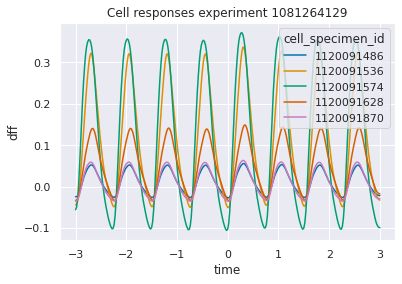

In [11]:
sns.lineplot(data=one_experiments_etr_data,
             x='time',
             y='dff',
             hue = 'cell_specimen_id',
             n_boot=500,
             palette = 'colorblind')\
             .set(title = f"Cell responses experiment {one_experiments_etr_data['ophys_experiment_id'][0]}")

In [31]:
all_etrs = []
for name in etr_filenames:
  etr = pd.read_csv(f'/content/gdrive/MyDrive/neuromatch/mean_cell_etr_data/{name}').drop(columns = ['Unnamed: 0'])
  all_etrs.append(etr)
all_etrs = pd.concat(all_etrs).reset_index(drop=True)
# this should read all the files into one data frame so you can try to play with them a bit more, group by cre line, experience level, etc. make different graphs maybe

In [32]:
all_etrs

,ophys_experiment_id,cell_specimen_id,time,dff,ophys_session_id,ophys_container_id,mouse_id,cre_line,session_type,imaging_depth,experience_level
0,1081264129,1120091486,-3.00,-0.024646,1081012515,1079027842,546605,Sst-IRES-Cre,OPHYS_2_images_A_passive,229,Familiar
1,1081264129,1120091486,-2.98,-0.024209,1081012515,1079027842,546605,Sst-IRES-Cre,OPHYS_2_images_A_passive,229,Familiar
2,1081264129,1120091486,-2.96,-0.022281,1081012515,1079027842,546605,Sst-IRES-Cre,OPHYS_2_images_A_passive,229,Familiar
3,1081264129,1120091486,-2.94,-0.018495,1081012515,1079027842,546605,Sst-IRES-Cre,OPHYS_2_images_A_passive,229,Familiar
4,1081264129,1120091486,-2.92,-0.012587,1081012515,1079027842,546605,Sst-IRES-Cre,OPHYS_2_images_A_passive,229,Familiar
...,...,...,...,...,...,...,...,...,...,...,...
37620,945586431,1086619236,2.92,0.021127,944888114,1022731531,453991,Vip-IRES-Cre,OPHYS_3_images_A,225,Familiar
37621,945586431,1086619236,2.94,0.022124,944888114,1022731531,453991,Vip-IRES-Cre,OPHYS_3_images_A,225,Familiar
37622,945586431,1086619236,2.96,0.023012,944888114,1022731531,453991,Vip-IRES-Cre,OPHYS_3_images_A,225,Familiar
37623,945586431,1086619236,2.98,0.023498,944888114,1022731531,453991,Vip-IRES-Cre,OPHYS_3_images_A,225,Familiar


In [34]:
all_etrs[['ophys_experiment_id', 'cre_line', 'experience_level']].drop_duplicates()['cre_line'].value_counts() # how many experiments for each cre line we have

Vip-IRES-Cre    13
Sst-IRES-Cre    12
Name: cre_line, dtype: int64

In [35]:
all_etrs[['ophys_experiment_id', 'cre_line', 'experience_level']].drop_duplicates()['experience_level'].value_counts() # how many for each experience level

Familiar    11
Novel >1    10
Novel 1      4
Name: experience_level, dtype: int64

In [36]:
all_etrs[['cell_specimen_id', 'cre_line', 'experience_level']].drop_duplicates()['cre_line'].value_counts() # how many cells for each cre line we have

Vip-IRES-Cre    65
Sst-IRES-Cre    59
Name: cre_line, dtype: int64

In [37]:
all_etrs[['cell_specimen_id', 'cre_line', 'experience_level']].drop_duplicates()['experience_level'].value_counts() # how many cells for each experience level we have

Familiar    55
Novel >1    49
Novel 1     20
Name: experience_level, dtype: int64